# Introduction

**In this notebook, we will implement Gradient descent algorithms from scratch.**

In [1]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/advertising-dataset/Advertising.csv


In [2]:
df = pd.read_csv('/kaggle/input/advertising-dataset/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Define X variables and target y**

In [4]:
X = df[['TV','Radio','Newspaper']]
Y = df['Sales']

### Steps to follow

1. Randomly initialize the bias and wights
2. Method to calculate the predicted value of Y, that is, Y given the bias and weights.
3. calculate the cost function from predicted and actual Y.
4. Method to calculate the gradiants and adjust the bia and weights.
5. find optimal bias and weights

# 1. Ramdomly initialize the bias and weights

In [5]:
def initialize(dim):
    # for reproducible results, the seed it set to 42.
    np.random.seed(seed=42)
    np.random.seed(42)
    # random bias
    b = np.random.random()
    # random weights
    w = np.random.rand(dim)
    return b, w    

In [6]:
b, w = initialize(3)
print("Bias:", b, "Weights: ", w)

Bias: 0.3745401188473625 Weights:  [0.95071431 0.73199394 0.59865848]


# 2. Predict Y values from the bias and weights

In [7]:
# inputs:
# b- bias
# w- weights
# X- the input matrix

def predict_Y(b,w,X):
    return b + np.matmul(X, w)

In [8]:
b, w = initialize(3)
Y_hat = predict_Y(b,w,X)
Y_hat

0      288.230440
1       98.448186
2       91.812381
3      209.660629
4      215.130877
          ...    
195     47.661691
196     98.367732
197    179.289930
198    340.372055
199    232.538807
Length: 200, dtype: float64

# 3. Calculate the cost function MSE

In [9]:
# Inputs
# Y - actual values of y
# Y_hat - predicted values of y

def get_cost(Y, Y_hat):
    # calculating residuals 
    Y_resid = Y - Y_hat
    # matrix multiplication with self will give the square values then take the sum and
    # divide by the number of examples to calculate mean
    return np.sum(np.matmul(Y_resid.T, Y_resid))/len(Y_resid)

In [10]:
b, w = initialize(3)
Y_hat = predict_Y(b, w, X)
get_cost(Y, Y_hat)

32572.353322708568

# 4. Update the bias and weights

In [11]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
    # gradient of bias
    db = (np.sum(y_hat-y)*2)/len(y)
    # gradient of weights
    dw = (np.dot((y_hat-y),x)/len(y))
    # update bias and weights
    b_1 = b_0 - (learning_rate*db)    
    w_1 = w_0 - (learning_rate*dw)
    # return the new bias and beta values
    return b_1, w_1

In [12]:
b,w = initialize(3)
print(" After initialization-Bias: ",b, "weights: ", w)
Y_hat = predict_Y(b, w, X)
b,w = update_beta(X,Y, Y_hat, b, w, 0.01)
print("After first update-Bias: ", b, "Weights: ", w)

 After initialization-Bias:  0.3745401188473625 weights:  [0.95071431 0.73199394 0.59865848]
After first update-Bias:  -2.8548192193043223 Weights:  [-303.85548785  -39.33612931  -53.1393137 ]


# 5. Finding optimal Bias and weights

In [13]:
def run_gradient_descent(X, Y, alpha=0.01, num_iterations = 100):
    # initialize the bias and weights
    b,w = initialize(X.shape[1])
    
    iter_num = 0
    # gd_iterations_df to keep track of cost at every 10 iterations
    dg_iterations_df = pd.DataFrame(columns = ['iteration','cost'])
    result_idx = 0
    
    # run the iterations in a loop
    for each_iter in range(num_iterations):
        Y_hat = predict_Y(b,w, X)
        # calculate the cost
        this_cost = get_cost(Y,Y_hat)
        # store previos bias and weights 
        prev_b = b
        prev_w = w
        #update and calculate the new values of bias and weights
        b, w = update_beta(X,Y, Y_hat, prev_b, prev_w, alpha)
        
        # for every 10 iterations, store the cost (MSE)
        if (iter_num %10 == 0):
            dg_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx += 1
        iter_num += 1
   
    print("Final estimate of b nad w : ", b, w)
    # return the final bias, wrights and the cost at the end
    return dg_iterations_df, b, w

In [14]:
gd_iterations_df , b, w = run_gradient_descent(X,Y, alpha=0.001, num_iterations=200)

Final estimate of b nad w :  8.239682563730121e+290 [8.01514655e+292 9.89078670e+291 1.31107028e+292]


In [15]:
cost_df = gd_iterations_df[:10]
cost_df

,iteration,cost
0,0.0,3.257235e+04
1,10.0,6.296869e+33
2,20.0,1.227155e+63
3,30.0,2.391523e+92
4,40.0,4.660682e+121
5,50.0,9.082898e+150
6,60.0,1.770106e+180
7,70.0,3.449644e+209
8,80.0,6.722786e+238
9,90.0,1.310160e+268


## Observations

**Here, it should be noted that cost is descresing first to find minima and than it increses again to infinity.**

**At the 90 iterations we are archiving minimum cost** 

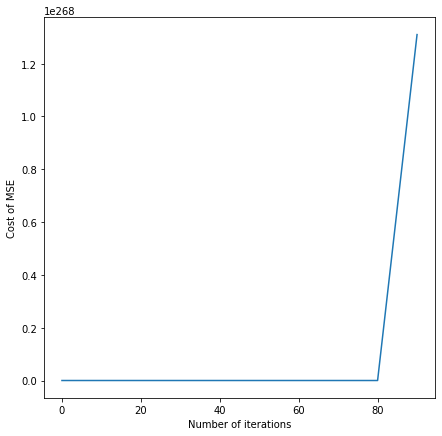

In [16]:
plt.figure(figsize=(7,7))
plt.plot(cost_df['iteration'], cost_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost of MSE")
plt.show()

In [17]:
df1, b, w = run_gradient_descent(X,Y, alpha=0.01, num_iterations=90)

Final estimate of b nad w :  1.0258520101089695e+221 [9.97896962e+222 1.23141679e+222 1.63230085e+222]


#### End of the notebook!